# 06. jhanvi831/Software-Engineer-Salary-Prediction

## Predictions with ML Regression Models | Series 2 (T4) - survey_results_public.csv

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import time
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression, Lasso, Ridge, QuantileRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, get_scorer_names
df = pd.read_csv('06_survey_results_public.csv')

In [2]:
# First 5 rows of the dataset
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [3]:
# Last 5 rows of the dataset
df.tail()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,...,18-24 years old,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0
83438,83439,I am a developer by profession,Employed full-time,Brazil,NaN,NaN,"Professional degree (JD, MD, etc.)",11 - 17 years,School,14,...,18-24 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Appropriate in length,Easy,21168.0


In [4]:
# All available columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

## Preprocessing

All preprocessing steps were carried out in almost exactly the same way as the author.

In [5]:
# Take only the meaningful columns:
# country, education level, years of coding as professional, employment type & converted comp. yearly
df_sub = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
# ConvertedCompYearly will be renamed to Salary
df_sub = df_sub.rename({"ConvertedCompYearly": "Salary"}, axis=1)
print("DATASET SHAPE:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE: (83439, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN
5,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, part-time",NaN
6,United States of America,"Secondary school (e.g. American high school, G...",NaN,I prefer not to say,NaN
7,Malaysia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
8,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed part-time,NaN
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0


In [6]:
# Rows with null salaries will be removed
df_sub = df_sub[df_sub['Salary'].notnull()]
print("DATASET SHAPE AFTER REMOVAL OF NULL SALARIES:", df_sub.shape)
df_sub.head(10)

DATASET SHAPE AFTER REMOVAL OF NULL SALARIES: (46844, 5)


,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,46135.0
18,Singapore,"Other doctoral degree (Ph.D., Ed.D., etc.)",30,I prefer not to say,160932.0
23,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",2,Employed full-time,38915.0
24,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,Employed full-time,77831.0
26,Switzerland,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,Employed full-time,81319.0


In [7]:
# Info about the current dataset
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [8]:
# Then, remove those rows containing null values. There should be no more...
df_sub = df_sub.dropna()
print("DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL:", df_sub.shape)
df_sub.isnull().sum()

DATASET SHAPE AFTER REMOVAL OF ROWS WITH NULL: (46359, 5)


Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [9]:
# Also, select such rows where person was employed as full time
df_sub = df_sub[df_sub["Employment"] == "Employed full-time"]
df_sub = df_sub.drop("Employment", axis=1)
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40211 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       40211 non-null  object 
 1   EdLevel       40211 non-null  object 
 2   YearsCodePro  40211 non-null  object 
 3   Salary        40211 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [10]:
# Let's filter the countries such that their counts lower than the cutoff value are moved to 'Other'
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [11]:
# After that, we have these counts of countries as below
country_map = shorten_categories(df_sub['Country'].value_counts(), 400)
# print(country_map)
print("CURRENT DATASET SHAPE:", df_sub.shape)
df_sub['Country'] = df_sub['Country'].map(country_map)
df_sub['Country'].value_counts()

CURRENT DATASET SHAPE: (40211, 4)


Other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [12]:
# It's better to remove the outliers once and for all!
df_sub = df_sub[df_sub["Salary"] <= 200000]
df_sub = df_sub[df_sub["Salary"] >= 10000]
df_sub = df_sub[df_sub['Country'] != 'Other']  # Even other countries are dropped as well

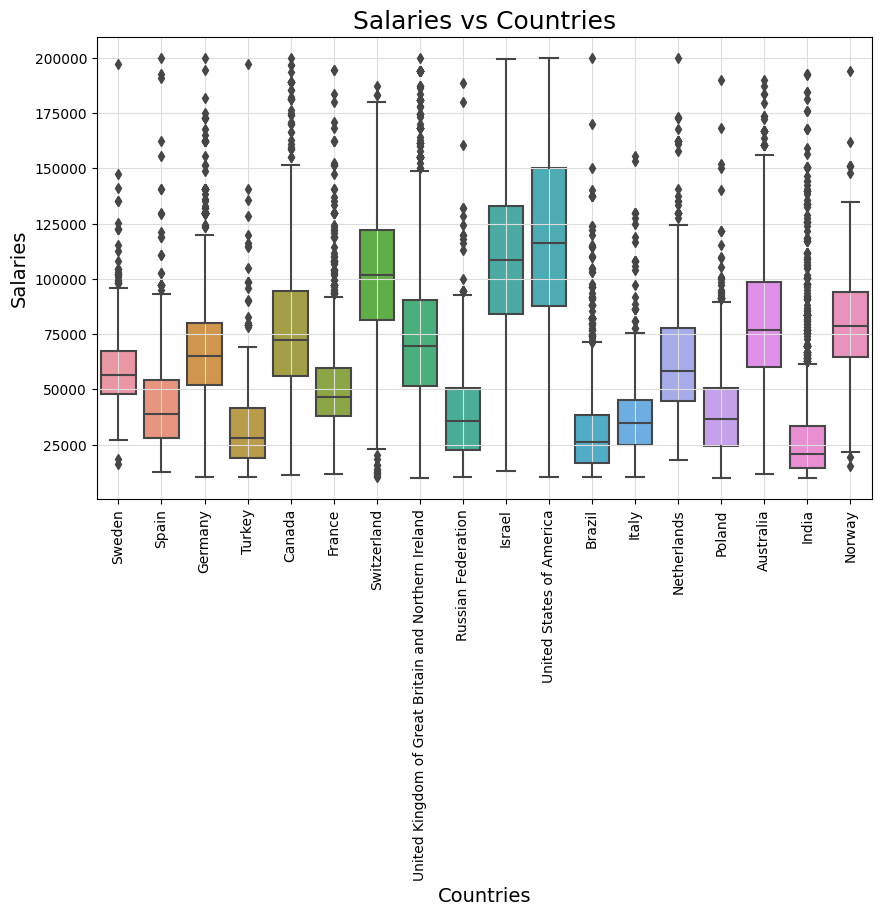

In [13]:
# Box plot visualization: Salaries vs Countries
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sub, x='Country', y='Salary')
plt.title("Salaries vs Countries", fontsize=18)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Salaries', fontsize=14)
plt.xticks(rotation=90)
plt.grid(color='#dddddd')
plt.show()

In [14]:
print("CURRENT DATASET SHAPE:", df_sub.shape)

CURRENT DATASET SHAPE: (25580, 4)


In [15]:
# Let's check the unique values of 'years of coding as professional' column (note the data type: object)
df_sub["YearsCodePro"].unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '26', '34', '11', '25',
       '24', '22', '13', '9', '7', '39', '20', '27', '23', '30', '19',
       '35', '33', '43', '40', '29', '38', '31', '42', '28', '46', '32',
       '36', '37', '47', '45', '44', '41', 'More than 50 years', '50',
       '49', '48'], dtype=object)

In [16]:
# It's better to convert the such texts into numbers, so it can be processed appropriately.
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
df_sub['YearsCodePro'] = df_sub['YearsCodePro'].apply(clean_experience)

In [17]:
df_sub["YearsCodePro"].unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. , 26. , 34. , 11. , 25. , 24. , 22. ,
       13. ,  9. ,  7. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. , 37. ,
       47. , 45. , 44. , 41. , 50. , 49. , 48. ])

In [18]:
# How about education levels?
df_sub["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [19]:
# Well, these need to be simplified, thus they can be handled easily
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor'
    if 'Master’s degree' in x:
        return 'Master'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'PostGrad'
    return 'LessThanBachelor'
df_sub['EdLevel'] = df_sub['EdLevel'].apply(clean_education)

In [20]:
df_sub["EdLevel"].unique()

array(['Master', 'Bachelor', 'PostGrad', 'LessThanBachelor'], dtype=object)

In [21]:
# Simplify the country names especially for USA and United Kingdom
def simplify_country_names(country):
    if country == 'United States of America':
        return 'USA'
    elif country == 'United Kingdom of Great Britain and Northern Ireland':
        return 'United Kingdom'
    else:
        return country
df_sub['Country'] = df_sub['Country'].apply(simplify_country_names)

In [22]:
df_sub['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Turkey', 'Canada', 'France',
       'Switzerland', 'United Kingdom', 'Russian Federation', 'Israel',
       'USA', 'Brazil', 'Italy', 'Netherlands', 'Poland', 'Australia',
       'India', 'Norway'], dtype=object)

## Prepare Train and Test Sets

In [23]:
# Unlike what was done in 1st regression series, we'll create dummy variables for both education levels and countries
dummy_edu = pd.get_dummies(df_sub['EdLevel'])
dummy_country = pd.get_dummies(df_sub['Country'])
df_sub2 = pd.concat([dummy_edu, dummy_country, df_sub['YearsCodePro'], df_sub['Salary']], axis=1)
print("CURRENT DATASET SHAPE:", df_sub2.shape)
df_sub2.head(10)

CURRENT DATASET SHAPE: (25580, 24)


,Bachelor,LessThanBachelor,Master,PostGrad,Australia,Brazil,Canada,France,Germany,India,...,Poland,Russian Federation,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom,YearsCodePro,Salary
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4.0,51552.0
11,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,5.0,46482.0
12,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6.0,77290.0
16,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,17748.0
17,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,6.0,46135.0
23,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2.0,38915.0
24,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,18.0,77831.0
26,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,5.0,81319.0
27,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,21.0,68507.0
29,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,16.0,37752.0


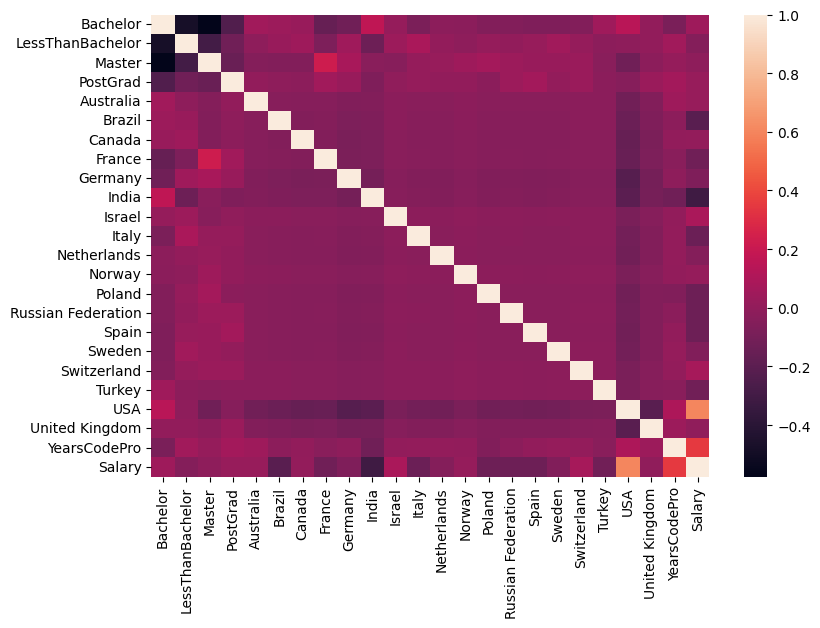

#### COLUMN CORRELATIONS AGAINST SALARIES ####
Bachelor              0.044882
LessThanBachelor     -0.051838
Master               -0.015085
PostGrad              0.021090
Australia             0.021316
Brazil               -0.208763
Canada                0.008739
France               -0.123342
Germany              -0.069303
India                -0.315436
Israel                0.086299
Italy                -0.140597
Netherlands          -0.049947
Norway                0.013708
Poland               -0.136783
Russian Federation   -0.135182
Spain                -0.133264
Sweden               -0.063445
Switzerland           0.073046
Turkey               -0.115985
USA                   0.605722
United Kingdom       -0.005894
YearsCodePro          0.352294
Salary                1.000000
Name: Salary, dtype: float64


In [24]:
# The correlations of all presented columns
plt.figure(figsize=(9,6))
sns.heatmap(df_sub2.corr())
plt.show()
print("#### COLUMN CORRELATIONS AGAINST SALARIES ####")
print(df_sub2.corr()['Salary'])

### Type 4: Use Negatively Correlated Columns Only

In [25]:
# Use 80% of the dataset as training, and 20% as testing
# X = df_sub2.drop(columns='Salary', axis=1)
X = df_sub2[['LessThanBachelor','Master','Brazil','France','Germany','India','Italy','Netherlands','Poland','Russian Federation',
             'Spain','Sweden','Turkey','United Kingdom']]
Y = df_sub2.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
print("TRAIN SIZE:", x_train.shape, y_train.shape, "  TEST SIZE:", x_test.shape, y_test.shape)
print(X.columns)

TRAIN SIZE: (20464, 14) (20464,)   TEST SIZE: (5116, 14) (5116,)
Index(['LessThanBachelor', 'Master', 'Brazil', 'France', 'Germany', 'India',
       'Italy', 'Netherlands', 'Poland', 'Russian Federation', 'Spain',
       'Sweden', 'Turkey', 'United Kingdom'],
      dtype='object')


In [26]:
# Create lists to store results of error values of all regression methods
res_mse, res_rmse, res_mae, res_r2, res_cv_train, res_cv_test = [], [], [], [], [], []

# ML Regression Models

## 1 - Linear Regression

In [27]:
linreg = LinearRegression()
linreg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
# Fit the training data into the linear reg. model, then make predictions on the test data
s_time = time.time()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.015 seconds.


In [29]:
print("COEF:", linreg.coef_)   # Estimated coefficients for the linear reg.
print("RANK:", linreg.rank_)   # Rank of matrix
print("INTERCEPT:", linreg.intercept_)   # Independent term in the linear model

COEF: [ -7730.92334443   4958.56082596 -74957.2734404  -59472.42026439
 -41918.79661852 -79848.85825976 -69547.28076842 -44761.64722197
 -69577.92796095 -70014.28775095 -65188.33901756 -48335.08390297
 -74016.05381127 -32936.81772435]
RANK: 14
INTERCEPT: 108831.37840412339


In [30]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  108831.37840412339 |  69482.0
   71871.14261156527 | 108098.0
  108831.37840412339 | 189000.0
  108831.37840412339 | 115000.0
  108831.37840412339 |  47412.0
  108831.37840412339 | 200000.0
   68163.63733534927 |  84019.0
  108831.37840412339 |  80172.0
  54317.518965691874 |  37834.0
    44242.6584616671 |  43239.0
   68163.63733534927 | 148648.0
  108831.37840412339 | 150000.0
   113789.9392300827 | 183000.0
  54317.518965691874 |  64859.0
   71871.14261156527 |  70264.0
  108831.37840412339 | 150000.0
   101100.4550596959 |  66810.0
   34815.32459285033 |  45360.0
  108831.37840412339 |  84000.0
   41628.03479530508 |  38916.0


In [31]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)         # Mean squared error
print("RMSE:", rmse)       # Root mean squared error
print("MAE:", mae)         # Mean absolute error
print("R2 SCORE:", r2)     # R2 score
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(linreg, X, Y, cv=5, return_train_score=True)    # 5-fold Cross Validation
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1104951549.2130463
RMSE: 33240.81150051915
MAE: 25189.55928065117
R2 SCORE: 0.4581171966402733

# CROSS VALIDATION #
FITTING TIME: [0.01402068 0.0211277  0.01127219 0.00605893 0.015661  ] -> 0.013628101348876953
SCORING TIME: [0.         0.00203133 0.00099993 0.         0.        ] -> 0.0006062507629394532
TRAIN SCORE: [0.47542304 0.46199838 0.46620698 0.46090231 0.46270829] -> 0.4654477996253445
TEST SCORE: [0.42487896 0.47405089 0.45753918 0.45948841 0.476067  ] -> 0.45840488766264836


## 2 - Lasso Regression

In [32]:
lasso = Lasso()
lasso.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [33]:
# Fit the training data into the lasso model, then make predictions on the test data
s_time = time.time()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.048 seconds.


In [34]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_)  

COEF: [ -7730.16192005   4944.49776308 -74907.3588288  -59418.35997517
 -41878.55222314 -79809.12151235 -69482.28757335 -44701.05134465
 -69513.1427124  -69946.05927569 -65127.10620277 -48270.52116681
 -73922.99278398 -32897.54311306]
INTERCEPT: 108806.32933367518
ITERATIONS: 12


In [35]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  108806.32933367518 |  69482.0
   71872.27487362115 | 108098.0
  108806.32933367518 | 189000.0
  108806.32933367518 | 115000.0
  108806.32933367518 |  47412.0
  108806.32933367518 | 200000.0
   68178.62430057317 |  84019.0
  108806.32933367518 |  80172.0
   54332.46712158789 |  37834.0
   44268.53952341209 |  43239.0
   68178.62430057317 | 148648.0
  108806.32933367518 | 150000.0
  113750.82709675809 | 183000.0
   54332.46712158789 |  64859.0
   71872.27487362115 |  70264.0
  108806.32933367518 | 150000.0
  101076.16741362933 |  66810.0
    34883.3365496981 |  45360.0
  108806.32933367518 |  84000.0
   41657.80743845913 |  38916.0


In [36]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)          
print("RMSE:", rmse)       
print("MAE:", mae)        
print("R2 SCORE:", r2)
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1104937741.2287428
RMSE: 33240.603803612576
MAE: 25191.080515609883
R2 SCORE: 0.4581239682577696

# CROSS VALIDATION #
FITTING TIME: [0.05119658 0.03762913 0.0383544  0.04159999 0.04537702] -> 0.0428314208984375
SCORING TIME: [0.00202847 0.         0.00125623 0.00168562 0.00197673] -> 0.0013894081115722657
TRAIN SCORE: [0.47542269 0.46199803 0.46620663 0.46090195 0.46270794] -> 0.46544744920637005
TEST SCORE: [0.4249112  0.47406516 0.4575705  0.45941565 0.47605649] -> 0.45840380080325216


## 3 - Ridge Regression

In [37]:
ridge = Ridge()
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [38]:
# Fit the training data into the ridge model, then make predictions on the test data
s_time = time.time()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.012 seconds.


In [39]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [ -7739.37897628   4930.36521348 -74793.09464925 -59322.03742776
 -41811.06421871 -79722.99498858 -69339.01354931 -44608.199736
 -69374.81801184 -69797.66651635 -65001.41897617 -48165.91873081
 -73698.74559631 -32836.26524006]
INTERCEPT: 108756.89084917761
ITERATIONS: None


In [40]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  108756.89084917761 |  69482.0
   71876.19184394613 | 108098.0
  108756.89084917761 | 189000.0
  108756.89084917761 | 115000.0
  108756.89084917761 |  47412.0
  108756.89084917761 | 200000.0
   68181.24663283766 |  84019.0
  108756.89084917761 |  80172.0
   54365.21863488873 |  37834.0
   44348.24251334116 |  43239.0
   68181.24663283766 | 148648.0
  108756.89084917761 | 150000.0
  113687.25606265276 | 183000.0
   54365.21863488873 |  64859.0
   71876.19184394613 |  70264.0
  108756.89084917761 | 150000.0
   101017.5118729014 |  66810.0
   35058.14525286657 |  45360.0
  108756.89084917761 |  84000.0
  41695.474445137384 |  38916.0


In [41]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1104919540.869291
RMSE: 33240.33003550493
MAE: 25194.696209433874
R2 SCORE: 0.4581328939539314

# CROSS VALIDATION #
FITTING TIME: [0.0064075  0.00532269 0.01441193 0.00499463 0.00590706] -> 0.007408761978149414
SCORING TIME: [0.         0.         0.00101924 0.00197649 0.00197077] -> 0.0009932994842529296
TRAIN SCORE: [0.47541982 0.46199519 0.46620379 0.4608992  0.46270515] -> 0.465444631526823
TEST SCORE: [0.42496602 0.47409512 0.45762287 0.45927374 0.47604834] -> 0.45840121883316576


## 4 - Polynomial Regression

In [42]:
poly_feat = PolynomialFeatures(degree=2)
poly_feat.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}

In [43]:
# Fit then transform for both training and test data (the number of columns must increase)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.fit_transform(x_test)
print(x_poly_train.shape, x_poly_test.shape)

(20464, 120) (5116, 120)


### Polynomial Regression with Lasso

In [44]:
lasso = Lasso()
s_time = time.time()
lasso.fit(x_poly_train, y_train)
y_poly_pred = lasso.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.481 seconds.


In [45]:
print("COEF:", lasso.coef_)   # Parameter vector (w in the cost function function formula)
print("INTERCEPT:", lasso.intercept_)   # Independent term in decision function
# Number of iterations run by the coord. descent solver to reach the specified tolerance
print("ITERATIONS:", lasso.n_iter_) 

COEF: [     0.          -7008.77361112   1960.43980811 -53394.33377953
 -37085.07922921 -20598.80743115 -62895.30592807 -53674.57897377
 -29078.16587375 -54611.00378369 -56383.90812416 -53029.66356603
 -36920.35015168 -63675.25654326 -23866.56911073  -1984.55213105
      0.           3447.80819582   3350.14543379  -2222.44131221
   7038.98149457   4213.99857069  10564.67190683   4574.13930436
   1728.48208876   7122.33048      5605.20382798   1765.04217131
   -613.36922901   4809.05946298  -2095.25454163  -6234.01722231
  -1545.32060459  -5277.18424534  -6969.62163739   4549.47461015
  -1375.02888066  -3585.08900019  -5063.05721107  -2305.96524195
   4877.18141575  -2326.27704948 -21911.93910103      0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.         -19371.19862069      0.
      0.              0.              0.              0.
      0.              0.              0.              0.
  

In [46]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)          
print("RMSE:", rmse)     
print("MAE:", mae)         
print("R2 SCORE:", r2)    
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(lasso, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1103815183.7750955
RMSE: 33223.71417790454
MAE: 25173.355704357877
R2 SCORE: 0.45867448522871546

# CROSS VALIDATION #
FITTING TIME: [0.05329418 0.04744267 0.04218316 0.04131413 0.04092526] -> 0.04503188133239746
SCORING TIME: [0.         0.         0.00226736 0.00199914 0.00199962] -> 0.001253223419189453
TRAIN SCORE: [0.47542269 0.46199803 0.46620663 0.46090195 0.46270794] -> 0.46544744920637005
TEST SCORE: [0.4249112  0.47406516 0.4575705  0.45941565 0.47605649] -> 0.45840380080325216


### Polynomial Regression with Ridge

In [47]:
ridge = Ridge()
s_time = time.time()
ridge.fit(x_poly_train, y_train)
y_poly_pred = ridge.predict(x_poly_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.030 seconds.


In [48]:
print("COEF:", ridge.coef_)   # Weight vector(s)
print("INTERCEPT:", ridge.intercept_)   # Independent term in decision function
print("ITERATIONS:", ridge.n_iter_)   # Actual number of iterations for each target. (Only for 'sag' & 'lsqr' solvers)

COEF: [     0.          -4520.75099533   3440.49205998 -37624.0824162
 -28208.12346091 -20457.93735525 -39525.06468414 -34476.45262502
 -24324.66272814 -35151.2033555  -34613.10238483 -32703.40550306
 -24668.53824811 -37525.9582243  -16129.06378609  -4520.75099533
      0.           3540.51129909   3595.51351263  -2257.14698167
   7390.55023807   4271.60225422  10749.05518771   4639.33416516
   1902.26395601   7204.27653763   5701.46494586   2293.55626357
   -651.11946752   3440.49206     -2380.09010913  -6378.6385163
  -1729.36379758  -5442.90976791  -7222.30070383   4591.49972591
  -1647.26169034  -3833.20248515  -5300.53814681  -2551.2865398
   5142.49246599  -2510.57901274 -37624.08241581      0.
      0.              0.              0.              0.
      0.              0.              0.              0.
      0.              0.         -28208.1234609       0.
      0.              0.              0.              0.
      0.              0.              0.              0.
     

In [49]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_poly_pred), mean_squared_error(y_test, y_poly_pred, squared=False), \
    mean_absolute_error(y_test, y_poly_pred), r2_score(y_test, y_poly_pred)
print("MSE:", mse)        
print("RMSE:", rmse)       
print("MAE:", mae)          
print("R2 SCORE:", r2)      
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(ridge, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1103867924.7767913
RMSE: 33224.50789367378
MAE: 25175.295251842257
R2 SCORE: 0.45864862034634

# CROSS VALIDATION #
FITTING TIME: [0.00981951 0.         0.00600314 0.00706363 0.00600672] -> 0.005778598785400391
SCORING TIME: [0.00324392 0.         0.00167084 0.00128412 0.00199199] -> 0.001638174057006836
TRAIN SCORE: [0.47541982 0.46199519 0.46620379 0.4608992  0.46270515] -> 0.465444631526823
TEST SCORE: [0.42496602 0.47409512 0.45762287 0.45927374 0.47604834] -> 0.45840121883316576


## 5 - Decision Tree Regression

In [50]:
# dtree = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=None, min_samples_split=2,
#                              min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', max_leaf_nodes=10,
#                              min_impurity_decrease=0.2, ccp_alpha=0.0)
dtree = DecisionTreeRegressor()
dtree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [51]:
# Fit the training data into the decision tree, then make predictions on the test data
s_time = time.time()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.018 seconds.


In [52]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  108758.47205773501 |  69482.0
   72920.68679245283 | 108098.0
  108758.47205773501 | 189000.0
  108758.47205773501 | 115000.0
  108758.47205773501 |  47412.0
  108758.47205773501 | 200000.0
   66734.58356164384 |  84019.0
  108758.47205773501 |  80172.0
  52764.453296703294 |  37834.0
   39349.90476190476 |  43239.0
   66734.58356164384 | 148648.0
  108758.47205773501 | 150000.0
  115587.19147694104 | 183000.0
  52764.453296703294 |  64859.0
   72920.68679245283 |  70264.0
  108758.47205773501 | 150000.0
   99616.37147595357 |  66810.0
   33426.07441860465 |  45360.0
  108758.47205773501 |  84000.0
           46869.825 |  38916.0


In [53]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(dtree, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1103962280.8956268
RMSE: 33225.92784100433
MAE: 25173.670582577848
R2 SCORE: 0.4586023468620184

# CROSS VALIDATION #
FITTING TIME: [0.01939869 0.01413894 0.01204467 0.01251173 0.01199746] -> 0.01401829719543457
SCORING TIME: [0.00200248 0.00201273 0.00199842 0.00200272 0.00151014] -> 0.0019052982330322265
TRAIN SCORE: [0.47664825 0.46340156 0.46776972 0.46248194 0.46394298] -> 0.4668488910319438
TEST SCORE: [0.42600704 0.47465618 0.45708401 0.45951014 0.47739464] -> 0.4589303993463686


## 6 - Random Forest Regression

In [54]:
# rforest = RandomForestRegressor(n_estimators=100, criterion='friedman_mse', max_depth=20, min_samples_split=4, 
#                                 min_samples_leaf=4, min_weight_fraction_leaf=0.1, max_features=None, max_leaf_nodes=None,
#                                 bootstrap=True, warm_start=False, ccp_alpha=0.2, max_samples=None)
rforest = RandomForestRegressor()
rforest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [55]:
# Fit the training data into the random forest, then make predictions on the test data
s_time = time.time()
rforest.fit(x_train, y_train)
y_pred = rforest.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.747 seconds.


In [56]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

   108778.2183142069 |  69482.0
   72927.42393643597 | 108098.0
   108778.2183142069 | 189000.0
   108778.2183142069 | 115000.0
   108778.2183142069 |  47412.0
   108778.2183142069 | 200000.0
   66605.27152253807 |  84019.0
   108778.2183142069 |  80172.0
   52645.46478498031 |  37834.0
  39282.855325743716 |  43239.0
   66605.27152253807 | 148648.0
   108778.2183142069 | 150000.0
  115565.74566717925 | 183000.0
   52645.46478498031 |  64859.0
   72927.42393643597 |  70264.0
   108778.2183142069 | 150000.0
   99476.23224471921 |  66810.0
  33201.214578878455 |  45360.0
   108778.2183142069 |  84000.0
   47041.38880152354 |  38916.0


In [57]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(rforest, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1103974023.216525
RMSE: 33226.10454471792
MAE: 25168.26893414128
R2 SCORE: 0.45859658827308225

# CROSS VALIDATION #
FITTING TIME: [0.70913124 0.70515633 0.77203107 0.74721289 0.71506786] -> 0.729719877243042
SCORING TIME: [0.03124952 0.03131342 0.03339219 0.02474689 0.03290677] -> 0.030721759796142577
TRAIN SCORE: [0.47664207 0.46339456 0.46776351 0.46247623 0.46393686] -> 0.4668426462828658
TEST SCORE: [0.42598212 0.47455746 0.45702164 0.45966081 0.47735339] -> 0.458915084448343


## 7 - KNN Regression

In [58]:
knnreg = KNeighborsRegressor()
knnreg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [59]:
# Fit the training data into the KNN regression model, then make predictions on the test data
s_time = time.time()
knnreg.fit(x_train, y_train)
y_pred = knnreg.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.801 seconds.


In [60]:
# The distance metric to use. It will be the same as the 'metric' parameter or a synonym of it, e.g. 'euclidean' if the
# metric parameter set to 'minkowski' and 'p' parameter is set to 2.
print("EFFECTIVE METRIC:", knnreg.effective_metric_)
# Additional keyword arguments for the metric function. For most metrics will be same with 'metric_params' parameter,
# but may also contain the 'p' parameter value if the 'effective_metric_' attribute is set to 'miknowski'.
print("EFFECTIVE METRIC PARAMS:", knnreg.effective_metric_params_)
print("FEATURES:", knnreg.n_features_in_)  # Number of features seen during fit
print("FEATURE NAMES:", knnreg.feature_names_in_)  # Names of features seen during fit
print("SAMPLES FIT:", knnreg.n_samples_fit_)  # Number of samples in the fitted data

EFFECTIVE METRIC: euclidean
EFFECTIVE METRIC PARAMS: {}
FEATURES: 14
FEATURE NAMES: ['LessThanBachelor' 'Master' 'Brazil' 'France' 'Germany' 'India' 'Italy'
 'Netherlands' 'Poland' 'Russian Federation' 'Spain' 'Sweden' 'Turkey'
 'United Kingdom']
SAMPLES FIT: 20464


In [61]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

            107086.2 |  69482.0
             81722.0 | 108098.0
            107086.2 | 189000.0
            107086.2 | 115000.0
            107086.2 |  47412.0
            107086.2 | 200000.0
             69793.6 |  84019.0
            107086.2 |  80172.0
             51715.2 |  37834.0
             59366.8 |  43239.0
             69793.6 | 148648.0
            107086.2 | 150000.0
             97692.6 | 183000.0
             51715.2 |  64859.0
             81722.0 |  70264.0
            107086.2 | 150000.0
            114744.6 |  66810.0
             37884.4 |  45360.0
            107086.2 |  84000.0
             53592.0 |  38916.0


In [62]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(knnreg, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1212477696.4259343
RMSE: 34820.65043082817
MAE: 26757.39761532447
R2 SCORE: 0.4053849568170085

# CROSS VALIDATION #
FITTING TIME: [0.04188061 0.04693103 0.04548335 0.03697634 0.03580523] -> 0.04141530990600586
SCORING TIME: [0.6797719  0.65411615 0.67115855 0.71167135 0.67114925] -> 0.6775734424591064
TRAIN SCORE: [0.39345289 0.34557255 0.40194496 0.36101365 0.35251543] -> 0.3708998954920216
TEST SCORE: [0.33698903 0.37135382 0.3856238  0.32904796 0.37900269] -> 0.3604034598476483


## 8 - Gradient Boosting

In [63]:
gradBoost = GradientBoostingRegressor()
gradBoost.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [64]:
# Fit the training data into the Gradient boosting regression model, then make predictions on the test data
s_time = time.time()
gradBoost.fit(x_train, y_train)
y_pred = gradBoost.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.435 seconds.


In [65]:
print("INIT:", gradBoost.init_)  # The estimator that provides the initial predictions
print("ESTIMATORS (FIRST 5):\n{}".format(gradBoost.estimators_[:5]))  # The collection of fitted sub-estimators
# The number of estimators as selected by early stopping (if 'n_iter_no_change' is specified).
# Otherwise, it is set to 'n_estimators'
print("# OF ESTIMATORS:", gradBoost.n_estimators_)
print("# OF FEATURES:", gradBoost.n_features_in_)  # Number of features seen during fit
print("MAX FEATURES:", gradBoost.max_features_)  # The inferred value of max_features
print("FEATURE IMPORTANCES:", gradBoost.feature_importances_)  # The impurity-based feature importances
# The i'th score 'train_score[i]' is the loss of the model at iteration i on the in-bag sample.
# If subsample == 1, this is the loss on the training data.
print("TRAIN SCORE:\n{}".format(gradBoost.train_score_))

INIT: DummyRegressor()
ESTIMATORS (FIRST 5):
[[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x27E783E1340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x27E783E1340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x27E783E1340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x27E783E1340)]
 [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                        random_state=RandomState(MT19937) at 0x27E783E1340)]]
# OF ESTIMATORS: 100
# OF FEATURES: 14
MAX FEATURES: 14
FEATURE IMPORTANCES: [0.01189733 0.00287267 0.13766604 0.07892207 0.06658053 0.26259854
 0.0763814  0.02881094 0.07767515 0.06820578 0.07063533 0.03288603
 0.04950674 0.03536146]
TRAIN SCORE:
[1.988

In [66]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

  101583.80078385018 |  69482.0
   74600.73100953907 | 108098.0
  101583.80078385018 | 189000.0
  101583.80078385018 | 115000.0
  101583.80078385018 |  47412.0
  101583.80078385018 | 200000.0
    73369.1106886872 |  84019.0
  101583.80078385018 |  80172.0
   58235.79551650497 |  37834.0
   47807.44047982022 |  43239.0
    73369.1106886872 | 148648.0
  101583.80078385018 | 150000.0
  101583.80078385018 | 183000.0
   58235.79551650497 |  64859.0
   74600.73100953907 |  70264.0
  101583.80078385018 | 150000.0
   97419.86750595148 |  66810.0
   45236.23094210565 |  45360.0
  101583.80078385018 |  84000.0
   52861.35062570846 |  38916.0


In [67]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(gradBoost, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1148295142.233124
RMSE: 33886.50383608678
MAE: 26159.15777189241
R2 SCORE: 0.43686092734038373

# CROSS VALIDATION #
FITTING TIME: [0.47865438 0.4726069  0.41713762 0.4113121  0.42585874] -> 0.4411139488220215
SCORING TIME: [0.         0.00067163 0.01562381 0.         0.00493574] -> 0.004246234893798828
TRAIN SCORE: [0.45079004 0.43891333 0.44401728 0.43568924 0.43860537] -> 0.4416030502819305
TEST SCORE: [0.40794081 0.45319767 0.44179128 0.41550108 0.4482888 ] -> 0.433343926939225


## 9 - XGBoost

In [68]:
xgb = xgboost.XGBRegressor()
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [69]:
# Fit the training data into the extreme gradient boosting regression model, then make predictions on the test data
s_time = time.time()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
print(">>> Fitting and prediction were completed in {:.3f} seconds.".format(time.time()-s_time))

>>> Fitting and prediction were completed in 0.098 seconds.


In [70]:
# Compare the predicted values against the actual ones for the first 20 rows of the test set
for i in range(20):
    print("{:20} | {:8}".format(y_pred[i], y_test.iloc[i]))

      108754.5859375 |  69482.0
       72926.5546875 | 108098.0
      108754.5859375 | 189000.0
      108754.5859375 | 115000.0
      108754.5859375 |  47412.0
      108754.5859375 | 200000.0
       66728.0859375 |  84019.0
      108754.5859375 |  80172.0
      52771.19140625 |  37834.0
      39373.92578125 |  43239.0
       66728.0859375 | 148648.0
      108754.5859375 | 150000.0
      115558.5859375 | 183000.0
      52771.19140625 |  64859.0
       72926.5546875 |  70264.0
      108754.5859375 | 150000.0
       99626.8671875 |  66810.0
       33431.8046875 |  45360.0
      108754.5859375 |  84000.0
       46867.6484375 |  38916.0


In [71]:
# Results of metrics
mse, rmse, mae, r2 = mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred, squared=False), \
    mean_absolute_error(y_test, y_pred), r2_score(y_test, y_pred)
print("MSE:", mse)        
print("RMSE:", rmse)      
print("MAE:", mae)        
print("R2 SCORE:", r2)  
res_mse.append(mse)
res_rmse.append(rmse)
res_mae.append(mae)
res_r2.append(r2)
print("\n# CROSS VALIDATION #")
cross_val = cross_validate(xgb, X, Y, cv=5, return_train_score=True)
print("FITTING TIME:", cross_val['fit_time'], "->", cross_val['fit_time'].mean())
print("SCORING TIME:", cross_val['score_time'], "->", cross_val['score_time'].mean())
print("TRAIN SCORE:", cross_val['train_score'], "->", cross_val['train_score'].mean())
res_cv_train.append(cross_val['train_score'].mean())
print("TEST SCORE:", cross_val['test_score'], "->", cross_val['test_score'].mean())
res_cv_test.append(cross_val['test_score'].mean())

MSE: 1103946786.842813
RMSE: 33225.69467810738
MAE: 25173.732163036308
R2 SCORE: 0.458609945349735

# CROSS VALIDATION #
FITTING TIME: [0.08883739 0.07045841 0.08602595 0.074512   0.06851459] -> 0.07766966819763184
SCORING TIME: [0.00500107 0.01562524 0.0049994  0.         0.01562691] -> 0.00825052261352539
TRAIN SCORE: [0.47664817 0.4634015  0.46776967 0.4624818  0.4639429 ] -> 0.466848807696547
TEST SCORE: [0.42600849 0.47465638 0.45709183 0.45949813 0.47739045] -> 0.45892905712053844


## Results of Metrics of All ML Models Together

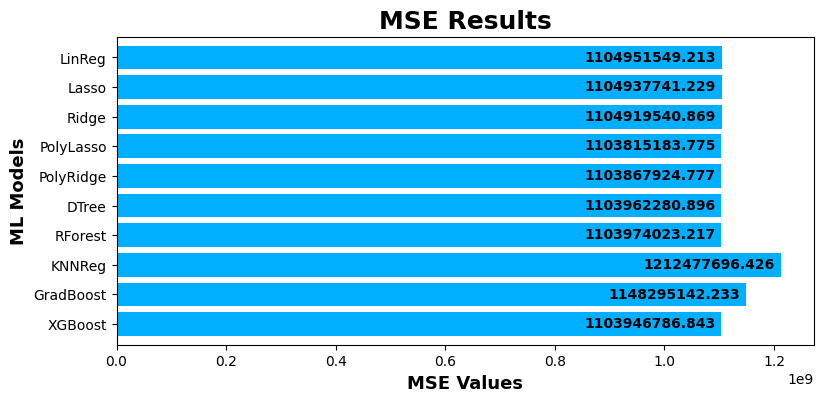

In [78]:
methods = ['LinReg', 'Lasso', 'Ridge', 'PolyLasso', 'PolyRidge', 'DTree', 'RForest', 'KNNReg', 'GradBoost', 'XGBoost']
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mse, color='#00afff')
plt.title("MSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mse[i]-250000000, i+0.12, "{:.3f}".format(res_mse[i]), fontweight='bold')
plt.show()

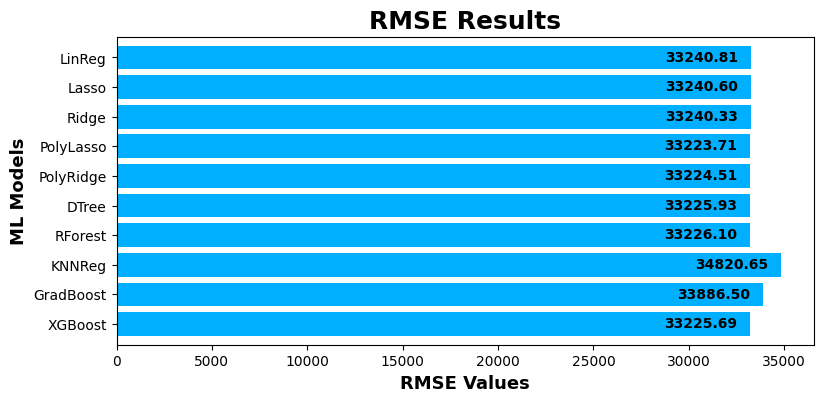

In [73]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_rmse, color='#00afff')
plt.title("RMSE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('RMSE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_rmse[i]-4500, i+0.12, "{:.2f}".format(res_rmse[i]), fontweight='bold')
plt.show()

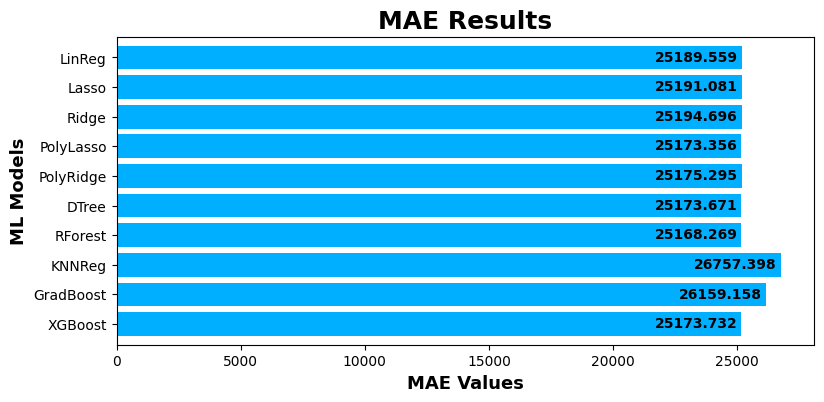

In [74]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_mae, color='#00afff')
plt.title("MAE Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('MAE Values', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_mae[i]-3500, i+0.12, "{:.3f}".format(res_mae[i]), fontweight='bold')
plt.show()

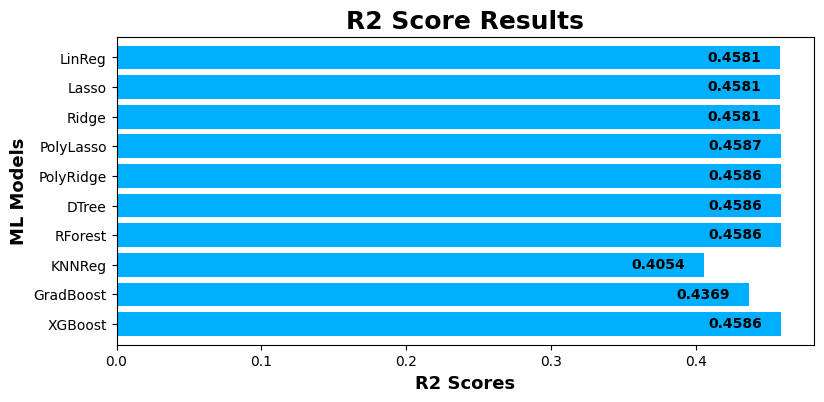

In [79]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_r2, color='#00afff')
plt.title("R2 Score Results", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('R2 Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_r2[i]-0.05, i+0.12, "{:.4f}".format(res_r2[i]), fontweight='bold')
plt.show()

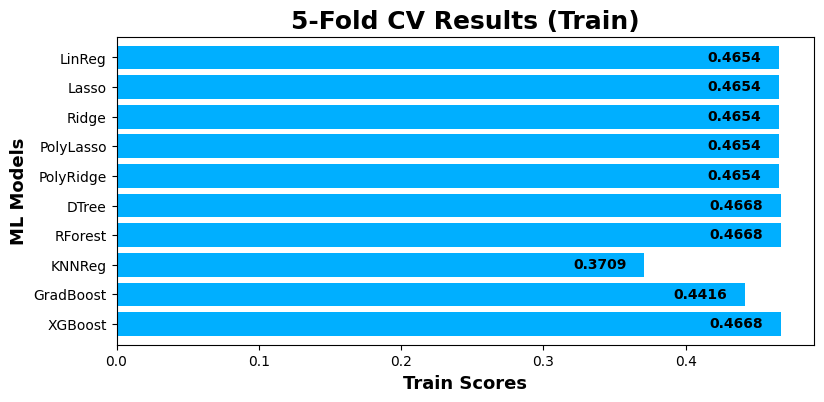

In [80]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_train, color='#00afff')
plt.title("5-Fold CV Results (Train)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Train Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_train[i]-0.05, i+0.12, "{:.4f}".format(res_cv_train[i]), fontweight='bold')
plt.show()

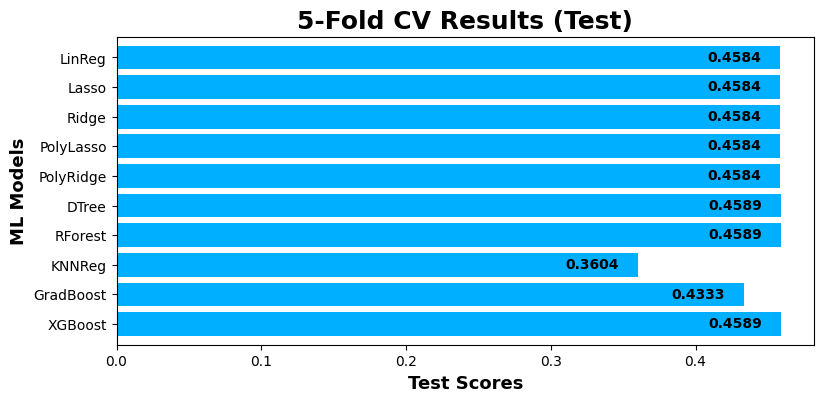

In [81]:
plt.figure(figsize=(9,4))
plt.barh(range(10), res_cv_test, color='#00afff')
plt.title("5-Fold CV Results (Test)", fontsize=18, fontweight='bold')
plt.yticks(range(10), methods)
plt.ylim(9.7,-0.7)
plt.xlabel('Test Scores', fontsize=13, fontweight='bold')
plt.ylabel('ML Models', fontsize=13, fontweight='bold')
for i in range(10):
    plt.text(res_cv_test[i]-0.05, i+0.12, "{:.4f}".format(res_cv_test[i]), fontweight='bold')
plt.show()